In [1]:
import math
import time
from matplotlib import pyplot as plt
import numpy as np

sureler = []
boyutlar = []

In [2]:
def sureOlc(func):
    def wrapper(*args, **kwargs):
        # milisaniye cinsinden sureyi hesapla
        baslangic = time.perf_counter()
        sonuc = func(*args, **kwargs)
        bitis = time.perf_counter()
        sure = (bitis - baslangic) * 1000  # saniye cinsinden süreyi milisaniyeye çevir
        sureler.append(sure)  # süreyi kaydet
        print("Fonksiyonun çalışma süresi: {:.2f} ms".format(sure))
        return sure, sonuc
    return wrapper

## En kısa yol hesaplama fonksiyonu

In [4]:
def calculate(cities):
    # Başlangıç şehri olarak ilk şehri seç
    start_city = cities[0]
    cities_to_visit = set(cities[1:])

    # En kısa yolu ve mesafeyi hesaplamak için kullanılacak değişkenler
    shortest_path = [start_city]
    shortest_distance = 0.0

    # İki nokta arasındaki mesafeyi hesaplamak için kullanılacak fonksiyon
    def distance(city1, city2):
        x1, y1 = city1
        x2, y2 = city2
        return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

    # Tüm şehirler ziyaret edilene kadar devam et
    while cities_to_visit:
        nearest_city = min(cities_to_visit, key=lambda city: distance(shortest_path[-1], city))
        shortest_path.append(nearest_city)
        cities_to_visit.remove(nearest_city)
        shortest_distance += distance(shortest_path[-2], shortest_path[-1])

    # Son şehirden başlangıç şehrine dön
    shortest_distance += distance(shortest_path[-1], start_city)
    shortest_path.append(start_city)
    indexList = []
    for i in shortest_path:
        indexList.append(cities.index(i))

    # En kısa yolu ve mesafeyi döndür
    return indexList, shortest_distance


In [5]:
toplam_mesafeler = []

In [6]:
@sureOlc
def main(f):
    boyut = f.readline()
    cities = [tuple(map(float, line.strip().split())) for line in f]
    enKisaYol, toplamMesafe = calculate(cities)
    print(f"Toplam mesafe {i}: {toplamMesafe}")
    toplam_mesafeler.append(toplamMesafe)

In [7]:
if __name__ == '__main__':
    boyutlar = [5, 124, 1000,5915,11849]
    for i in boyutlar:
        with open(f'tsp_{i}_1.txt') as f:
            main(f)

Toplam mesafe 5: 4.0
Fonksiyonun çalışma süresi: 0.42 ms
Toplam mesafe 124: 70123.66927940497
Fonksiyonun çalışma süresi: 3.47 ms
Toplam mesafe 1000: 22886884.829212695
Fonksiyonun çalışma süresi: 191.10 ms
Toplam mesafe 5915: 681235.3375693884
Fonksiyonun çalışma süresi: 6820.58 ms
Toplam mesafe 11849: 1121274.3128304896
Fonksiyonun çalışma süresi: 28406.69 ms


## Grafik Çizimi

[0.41589990723878145, 3.4709000028669834, 191.10219995491207, 6820.577000034973, 28406.694099889137]
[5, 124, 1000, 5915, 11849]


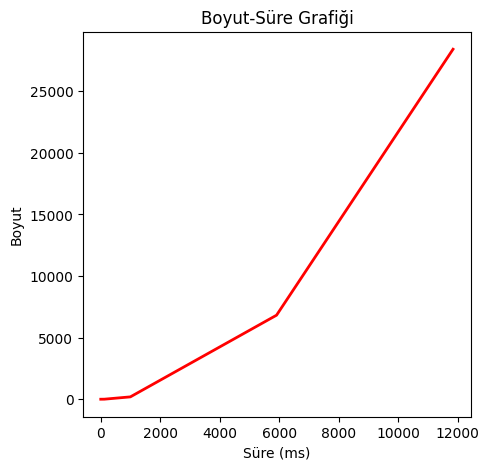

In [9]:
plt.figure(figsize=(5, 5))
print(sureler)
print(boyutlar)
x = np.array(boyutlar)
y = np.array(sureler)
plt.plot(x,y,color = 'red', linewidth = 2, markersize = 4, markerfacecolor = 'blue', markeredgecolor = 'blue', markeredgewidth = 2)
plt.xlabel('Süre (ms)')
plt.ylabel('Boyut')

plt.title('Boyut-Süre Grafiği')
plt.show()